In [21]:

# # IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# # TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# # THEN FEEL FREE TO DELETE THIS CELL.
# # NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# # ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# # NOTEBOOK.

# import os
# import sys
# from tempfile import NamedTemporaryFile
# from urllib.request import urlopen
# from urllib.parse import unquote, urlparse
# from urllib.error import HTTPError
# from zipfile import ZipFile
# import tarfile
# import shutil

# CHUNK_SIZE = 40960
# DATA_SOURCE_MAPPING = 'animal-image-dataset-90-different-animals:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1554380%2F3952946%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240429%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240429T163254Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D34d87b5599094cfa30424046acf2ff715386b8193d06db9685a4854c1c909657a8d2dbdf19148e3642bfa50c3c61c34400c1930e5a97e3dd61d443f27b7248987cbfabbe4b4ec481ce15504abb9c51f1c3f3f52be047dd734a227107bcf9c70a9e753625c018249e2bf44cf7b35d7d23c0d8f970af033306610907c4071bf7df2c6a5075264d88cf797d9833e196c971cfc4c8fcd7f4c3a39228d119910d1e2e4ea36b0264b8664ef42eb4751f107a45db29aa242a743b61ccc515883cc8495d00cffc2e5786166046505cd96f6c3fc0249132406089a65fb38836c085d8fbeb743411e5a354c5ba93756b4b44662032f7ca44166111d14d70971b0b7e4d352e'

# KAGGLE_INPUT_PATH='/kaggle/input'
# KAGGLE_WORKING_PATH='/kaggle/working'
# KAGGLE_SYMLINK='kaggle'

# !umount /kaggle/input/ 2> /dev/null
# shutil.rmtree('/kaggle/input', ignore_errors=True)
# os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
# os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

# try:
#   os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
# except FileExistsError:
#   pass
# try:
#   os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
# except FileExistsError:
#   pass

# for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
#     directory, download_url_encoded = data_source_mapping.split(':')
#     download_url = unquote(download_url_encoded)
#     filename = urlparse(download_url).path
#     destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
#     try:
#         with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
#             total_length = fileres.headers['content-length']
#             print(f'Downloading {directory}, {total_length} bytes compressed')
#             dl = 0
#             data = fileres.read(CHUNK_SIZE)
#             while len(data) > 0:
#                 dl += len(data)
#                 tfile.write(data)
#                 done = int(50 * dl / int(total_length))
#                 sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
#                 sys.stdout.flush()
#                 data = fileres.read(CHUNK_SIZE)
#             if filename.endswith('.zip'):
#               with ZipFile(tfile) as zfile:
#                 zfile.extractall(destination_path)
#             else:
#               with tarfile.open(tfile.name) as tarfile:
#                 tarfile.extractall(destination_path)
#             print(f'\nDownloaded and uncompressed: {directory}')
#     except HTTPError as e:
#         print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
#         continue
#     except OSError as e:
#         print(f'Failed to load {download_url} to path {destination_path}')
#         continue

# print('Data source import complete.')


In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/animal-image-dataset-90-different-animals/name of the animals.txt
/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/beetle/687486f1cb.jpg
/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/beetle/93fb82b04b.jpg
/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/beetle/7d7f6c9750.jpg
/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/beetle/0de750893f.jpg
/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/beetle/2fecd5e844.jpg
/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/beetle/514cd025fa.jpg
/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/beetle/44931701fe.jpg
/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/beetle/138f5c986e.jpg
/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/beetle/9977af1a6f.jpg
/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/be

In [23]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from PIL import Image
from sklearn.metrics import classification_report, f1_score, confusion_matrix
import random

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid
%matplotlib inline

In [24]:
# Set the device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Set the device globally
torch.set_default_device(device)

### Loading Dataset

In [25]:
# Loading Dataset
path = "/kaggle/input/animal-image-dataset-90-different-animals/animals/animals"

data = {"imgpath": [], "labels": []}

category = os.listdir(path)
for folder in category:
  folderpath = os.path.join(path, folder)
  filelist = os.listdir(folderpath)
  for file in filelist:
    fpath = os.path.join(folderpath, file)
    data["imgpath"].append(fpath)
    data["labels"].append(folder)

df = pd.DataFrame(data)


In [26]:
# from sklearn.utils import shuffle
# df = shuffle(df)
# df = df[:300]
# df

In [27]:
# Convert labels to numbers
lb = LabelEncoder()
df["encoded_labels"] = lb.fit_transform(df['labels'])
num_classes = len(df["encoded_labels"].unique())
num_classes

# # decode
# df["decoded_labels"] = lb.inverse_transform(df['encoded_labels'])
# df

90

### Show sample from data


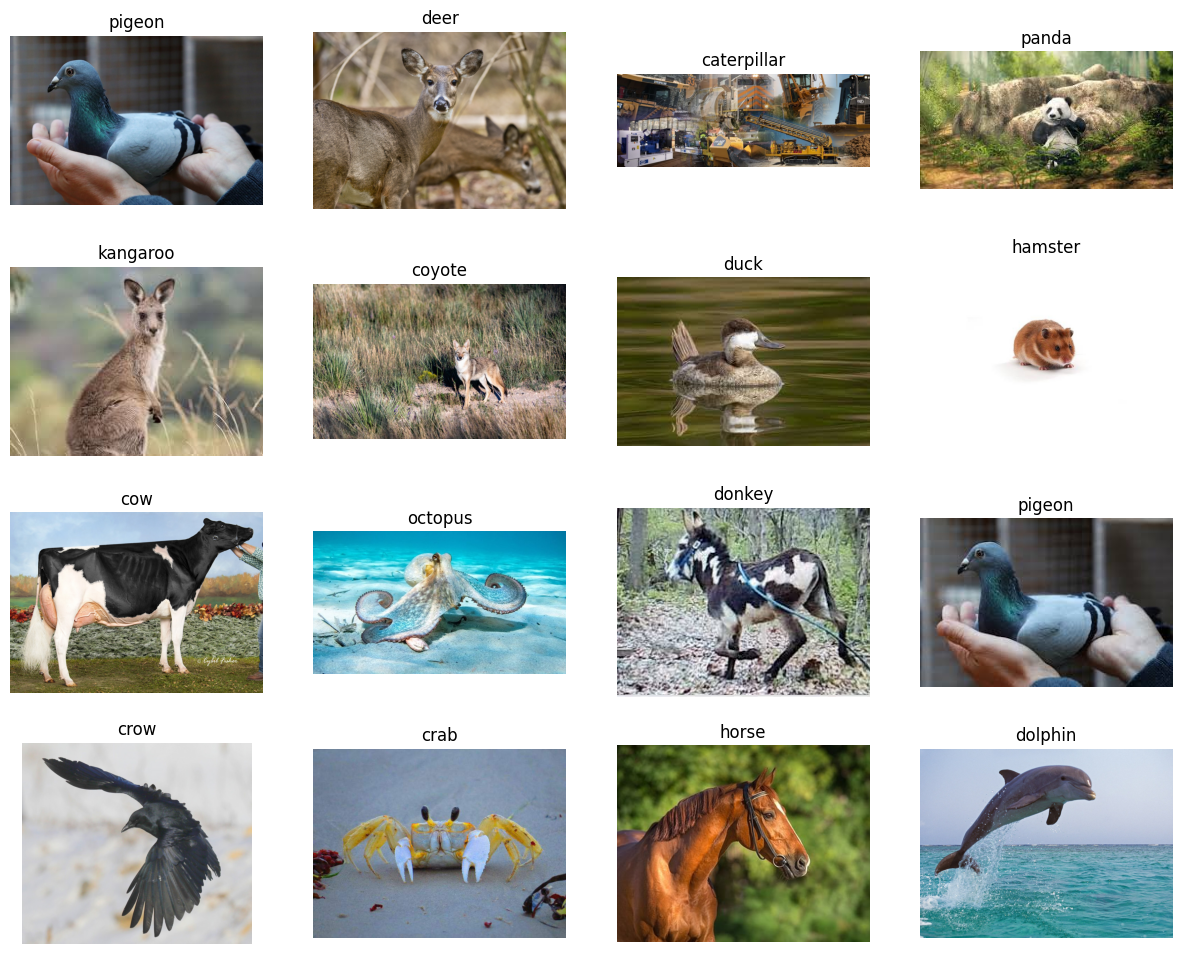

In [28]:
plt.figure(figsize=(15,12))
for i, row in df.sample(n=16).reset_index().iterrows():
  plt.subplot(4, 4, i+1)
  image_path = row["imgpath"]
  image = Image.open(image_path)
  plt.imshow(image)
  plt.title(row["labels"])
  plt.axis("off")
plt.show()

### Split the dataset into train and test

In [29]:
# Split into train, valid and test
train_df, temp_df = train_test_split(df, train_size=0.70, shuffle=True, random_state=42)
valid_df, test_df = train_test_split(temp_df, train_size=0.70, shuffle=True, random_state=42)
train_df = train_df.reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)
train_df

imgpath     labels  \
0     /kaggle/input/animal-image-dataset-90-differen...      goose   
1     /kaggle/input/animal-image-dataset-90-differen...   reindeer   
2     /kaggle/input/animal-image-dataset-90-differen...  porcupine   
3     /kaggle/input/animal-image-dataset-90-differen...         ox   
4     /kaggle/input/animal-image-dataset-90-differen...   squirrel   
...                                                 ...        ...   
3774  /kaggle/input/animal-image-dataset-90-differen...        cow   
3775  /kaggle/input/animal-image-dataset-90-differen...        cat   
3776  /kaggle/input/animal-image-dataset-90-differen...       deer   
3777  /kaggle/input/animal-image-dataset-90-differen...       boar   
3778  /kaggle/input/animal-image-dataset-90-differen...      bison   

      encoded_labels  
0                 30  
1                 69  
2                 65  
3                 57  
4                 79  
...              ...  
3774              13  
3775               9  
3776              17  
3777               7  
3778               6  

[3779 rows x 3 columns]

### Image augmentation


In [30]:
# Define data augmentation transformations
augmentation_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.RandomRotation(20),
    transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),
    transforms.RandomPerspective(distortion_scale=0.2, p=0.5, interpolation=3),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# augmentation_transform = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.RandomHorizontalFlip(),
#     transforms.RandomVerticalFlip(),
#     transforms.RandomRotation(15),
#     transforms.ColorJitter(brightness=0.15, contrast=0.15, saturation=0.15, hue=0.15),
#     transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
#     transforms.ToTensor(),
# ])


data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [31]:
# Define data augmentation transformations
augmentation_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# augmentation_transform = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.RandomHorizontalFlip(),
#     transforms.RandomVerticalFlip(),
#     transforms.RandomRotation(15),
#     transforms.ColorJitter(brightness=0.15, contrast=0.15, saturation=0.15, hue=0.15),
#     transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
#     transforms.ToTensor(),
# ])


data_transform = transforms.Compose([
    transforms.Resize(int(224 * 1.143)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

### Create the data loaders

In [32]:
# Define the dataset class - encapsulate in a class allows for memory data efficiency during training
class AnimalDataset(Dataset):
  def __init__(self, df, transform=None):
    self.df = df
    self.transform = transform

  def __len__(self):
    return len(self.df)

  def __getitem__(self, idx):
    img_path = self.df.iloc[idx]['imgpath']
    label = self.df.iloc[idx]['encoded_labels']
    img = Image.open(img_path).convert('RGB')
    if self.transform:
      img = self.transform(img)
    label = torch.tensor(label)

    # # Plot the image
    # plt.figure(figsize=(4, 4))
    # plt.imshow(img.permute(1, 2, 0))  # Assuming images are in format (C, H, W)
    # plt.title(f"Label: {label.item()}")
    # plt.axis('off')
    # plt.show()

    # Move the tensors to the correct device
    img = img.to(device)
    label = label.to(device)
    
    return img, label

#     def shuffle(self):
#             random.shuffle(self.indices)

In [33]:
# Create custom datasets with data augmentation
train_dataset = AnimalDataset(train_df, transform = augmentation_transform)
valid_dataset = AnimalDataset(valid_df, transform = data_transform)
test_dataset = AnimalDataset(test_df, transform = data_transform)

In [34]:
# Create DataLoader instances for training and test
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

### Model Structure

In [35]:
# Model Class
class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
    self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
    self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
    # Fully connected layer
    self.fc1 = nn.Linear(256 * 28 * 28, 512)
    self.fc2 = nn.Linear(512, 256)
    self.fc3 = nn.Linear(256, num_classes)

  def forward(self, X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X,2,2) # 2x2 kernel and stride 2
    # Second Pass
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X,2,2) # 2x2 kernel and stride 2
    # Third Pass
    X = F.relu(self.conv3(X))
    X = F.max_pool2d(X,2,2) # 2x2 kernel and stride 2

    # Re-View to flatten it out
    X = X.view(-1, 256 * 28 * 28)

    # Fully connected layers
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)
    return F.log_softmax(X, dim=1)


In [36]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models, transforms

class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super(ConvolutionalNetwork, self).__init__()
        # Load the pretrained model
        self.pretrained_model = models.efficientnet_b3(weights=models.EfficientNet_B3_Weights.IMAGENET1K_V1)
        # Freezing the layers of the pretrained model
        for param in self.pretrained_model.parameters():
            param.requires_grad = False
        # Modify the final layers
        self.pretrained_model._fc = nn.Identity()  # Remove the final fully connected layer

        # # Data Augmentation Layers
        # self.augment = nn.Sequential(
        #     transforms.RandomHorizontalFlip(),
        #     transforms.RandomVerticalFlip(),
        #     transforms.RandomRotation(15),
        #     transforms.ColorJitter(brightness=0.15, contrast=0.15, saturation=0.15, hue=0.15),
        #     transforms.RandomResizedCrop(224, scale=(0.8, 1.0))
        # )

        # New classifier layers
        self.fc1 = nn.Linear(1000, 256)  # Adjusted input size to match the output size of the backbone
        self.relu = nn.ReLU()
        self.batch_norm = nn.BatchNorm1d(256)  # Adjusted batch norm size
        self.dropout = nn.Dropout(0.45)
        self.fc2 = nn.Linear(256, num_classes)  # Adjusted output size to match the number of classes

    def forward(self, x):
        # x = self.augment(x)
        x = self.pretrained_model(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.batch_norm(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [37]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models, transforms

class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super(ConvolutionalNetwork, self).__init__()
        # Load the pretrained model
        self.pretrained_model = models.convnext_small(weights=models.ConvNeXt_Small_Weights.IMAGENET1K_V1)
        # Freezing the layers of the pretrained model
        for param in self.pretrained_model.parameters():
            param.requires_grad = False
        # Modify the final layers
        self.pretrained_model._fc = nn.Identity()  # Remove the final fully connected layer

        # # Data Augmentation Layers
        # self.augment = nn.Sequential(
        #     transforms.RandomHorizontalFlip(),
        #     transforms.RandomVerticalFlip(),
        #     transforms.RandomRotation(15),
        #     transforms.ColorJitter(brightness=0.15, contrast=0.15, saturation=0.15, hue=0.15),
        #     transforms.RandomResizedCrop(224, scale=(0.8, 1.0))
        # )

        # New classifier layers
        self.fc1 = nn.Linear(1000, 256)  # Adjusted input size to match the output size of the backbone
        self.relu = nn.ReLU()
        self.batch_norm = nn.BatchNorm1d(256)  # Adjusted batch norm size
        self.dropout = nn.Dropout(0.45) # 0.35
        self.fc2 = nn.Linear(256, num_classes)  # Adjusted output size to match the number of classes

    def forward(self, x):
        # x = self.augment(x)
        x = self.pretrained_model(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.batch_norm(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

In [38]:
# Create an instance of our model
torch.manual_seed(42)
model = ConvolutionalNetwork().to(device)
# model

### Training the model

In [39]:
# Loss function optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # lr=0.0002

In [40]:
import time
start_time = time.time()

# Create Variable to track things
epochs = 5
train_losses = []
valid_losses = []
test_losses = []
train_correct = []
valid_correct = []
test_correct = []

# For Loop Epochs
for i in range(epochs):
  trn_corr = 0
  vld_corr = 0
  tst_corr = 0

  # Train
  for b, (X_train, y_train) in enumerate(train_loader):
    b += 1 # start out batches at 1
    X_train, y_train = X_train.to(device), y_train.to(device)
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)

    predicted = torch.max(y_pred.data, 1)[1]
    batch_corr = (predicted == y_train).sum()
    trn_corr += batch_corr

    # Update our parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_losses.append(loss)
    # train_correct.append(trn_corr)
    train_correct.append(batch_corr/batch_size)


    # Test/Validation
    with torch.no_grad():
      for b_valid, (X_valid, y_valid) in enumerate(valid_loader):
        X_valid, y_valid = X_valid.to(device), y_valid.to(device)
        y_val = model.forward(X_valid)
        predicted = torch.max(y_val.data, 1)[1]
        # vld_corr += (predicted == y_valid).sum()
        vld_corr = (predicted == y_valid).sum()
        break

      loss_valid = criterion(y_val, y_valid)
      valid_losses.append(loss_valid)
      valid_correct.append(vld_corr/batch_size)

    # Print out some results
    if b%10==0:
      print(f'Epoch: {i} Batch: {b} Loss: {loss.item()} Corr: {batch_corr/batch_size} | LossValid: {loss_valid.item()} CorrValid: {vld_corr/batch_size}')

print(f'Trainig took: {(time.time() - start_time)/60} minutes')

Epoch: 0 Batch: 10 Loss: 4.57039737701416 Corr: 0.09375 | LossValid: 4.4506144523620605 CorrValid: 0.0625
Epoch: 0 Batch: 20 Loss: 4.427777290344238 Corr: 0.0625 | LossValid: 4.038061141967773 CorrValid: 0.03125
Epoch: 0 Batch: 30 Loss: 3.860243558883667 Corr: 0.21875 | LossValid: 3.839599847793579 CorrValid: 0.1875
Epoch: 0 Batch: 40 Loss: 3.7436063289642334 Corr: 0.21875 | LossValid: 3.4823808670043945 CorrValid: 0.375
Epoch: 0 Batch: 50 Loss: 3.248661994934082 Corr: 0.34375 | LossValid: 3.2091822624206543 CorrValid: 0.40625
Epoch: 0 Batch: 60 Loss: 3.3861024379730225 Corr: 0.34375 | LossValid: 2.9547739028930664 CorrValid: 0.53125
Epoch: 0 Batch: 70 Loss: 3.2236287593841553 Corr: 0.53125 | LossValid: 2.9175174236297607 CorrValid: 0.59375
Epoch: 0 Batch: 80 Loss: 2.788987636566162 Corr: 0.5 | LossValid: 2.5632522106170654 CorrValid: 0.625
Epoch: 0 Batch: 90 Loss: 2.4730889797210693 Corr: 0.78125 | LossValid: 2.436192274093628 CorrValid: 0.59375
Epoch: 0 Batch: 100 Loss: 2.77941656112

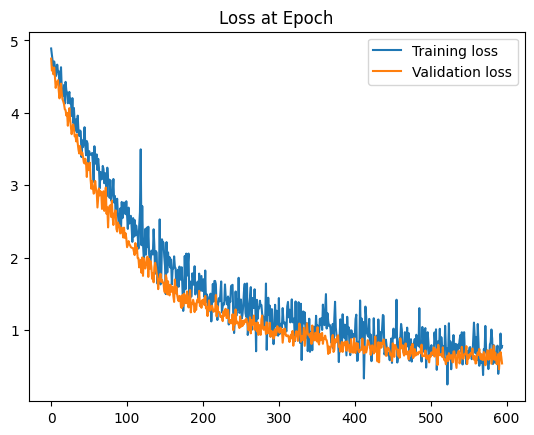

In [41]:
# Graph the loss at epoch
train_losses = [tl.item() for tl in train_losses]
valid_losses = [vl.item() for vl in valid_losses]  # Move to CPU
plt.plot(train_losses, label="Training loss")
plt.plot(valid_losses, label="Validation loss")
plt.title("Loss at Epoch")
plt.legend()

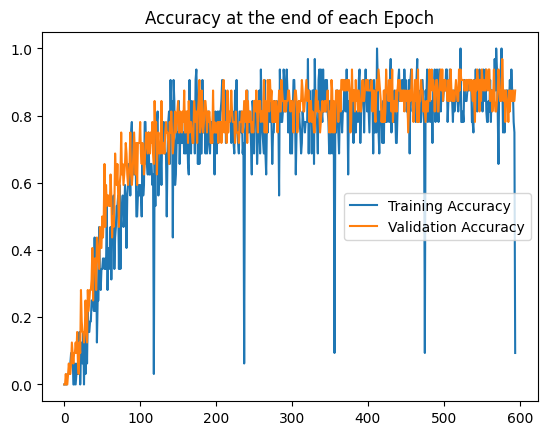

In [42]:
# graph the accuracy at the end of each epoch
train_correct = [tl.item() for tl in train_correct]
valid_correct = [vl.item() for vl in valid_correct]  # Move to CPU
plt.plot(train_correct, label="Training Accuracy")
plt.plot(valid_correct, label="Validation Accuracy")
plt.title("Accuracy at the end of each Epoch")
plt.legend()


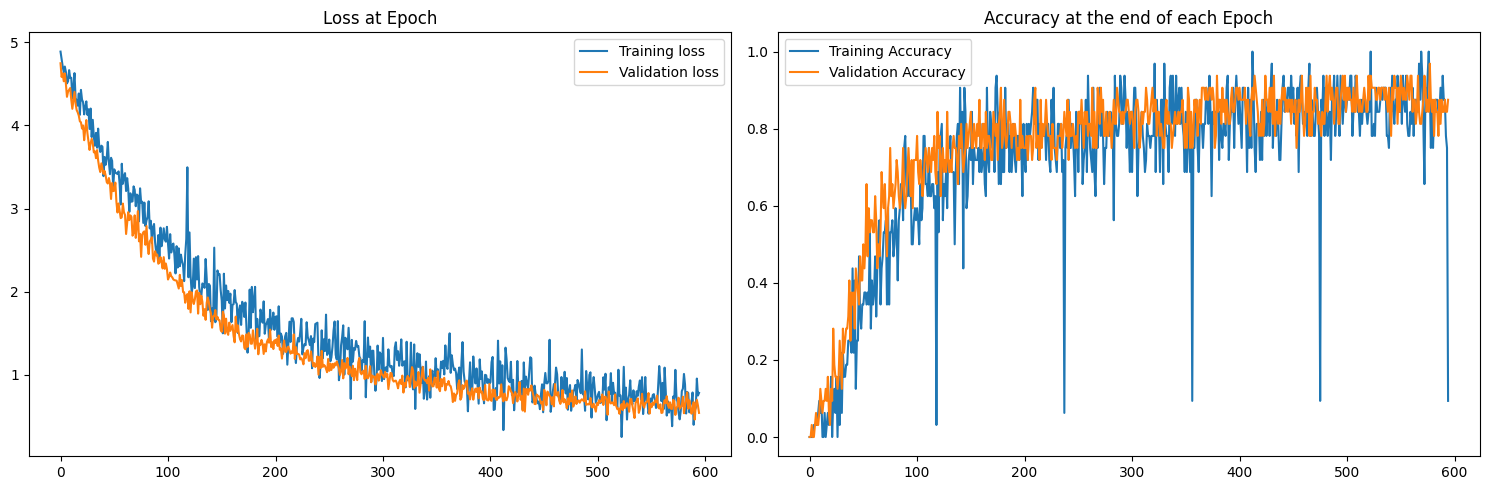

In [43]:
# Graph the loss at epoch
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot Loss
axs[0].plot(train_losses, label="Training loss")
axs[0].plot(valid_losses, label="Validation loss")
axs[0].set_title("Loss at Epoch")
axs[0].legend()

# Plot Accuracy
axs[1].plot(train_correct, label="Training Accuracy")
axs[1].plot(valid_correct, label="Validation Accuracy")
axs[1].set_title("Accuracy at the end of each Epoch")
axs[1].legend()

plt.tight_layout()
plt.show()

### Model Evaluate

In [44]:
valid_predictions = []
correct = 0
# test_load_all =  DataLoader(valid_dataset, batch_size=100000, shuffle=False)
with torch.no_grad():
  for X_test, y_test in valid_loader:
    X_test, y_test = X_test.to(device), y_test.to(device)
    y_val = model.forward(X_test)
    predicted = torch.max(y_val, 1)[1]
    correct += (predicted == y_test).sum()
    valid_predictions.append(predicted)

# Correct
test_acc = correct.item() / len(valid_dataset)
print(f"Test accuracy: {test_acc}")

Test accuracy: 0.9091710758377425


Get Predictions

In [45]:
# Concatenate the tensors
valid_predictions = torch.cat(valid_predictions, dim=0)
print(len(valid_df), len(valid_predictions))

1134 1134


In [46]:
predictions = valid_df
predictions['prediction'] = valid_predictions.to('cpu')
predictions['prediction_labels'] = lb.inverse_transform(predictions['prediction'])
predictions

imgpath      labels  \
0     /kaggle/input/animal-image-dataset-90-differen...      turkey   
1     /kaggle/input/animal-image-dataset-90-differen...         fox   
2     /kaggle/input/animal-image-dataset-90-differen...       koala   
3     /kaggle/input/animal-image-dataset-90-differen...      parrot   
4     /kaggle/input/animal-image-dataset-90-differen...        moth   
...                                                 ...         ...   
1129  /kaggle/input/animal-image-dataset-90-differen...    seahorse   
1130  /kaggle/input/animal-image-dataset-90-differen...         fox   
1131  /kaggle/input/animal-image-dataset-90-differen...   sandpiper   
1132  /kaggle/input/animal-image-dataset-90-differen...  woodpecker   
1133  /kaggle/input/animal-image-dataset-90-differen...    mosquito   

      encoded_labels  prediction prediction_labels  
0                 83          83            turkey  
1                 27          27               fox  
2                 43          43             koala  
3                 60          60            parrot  
4                 50          50              moth  
...              ...         ...               ...  
1129              72          72          seahorse  
1130              27          27               fox  
1131              71          71         sandpiper  
1132              88          88        woodpecker  
1133              49          49          mosquito  

[1134 rows x 5 columns]

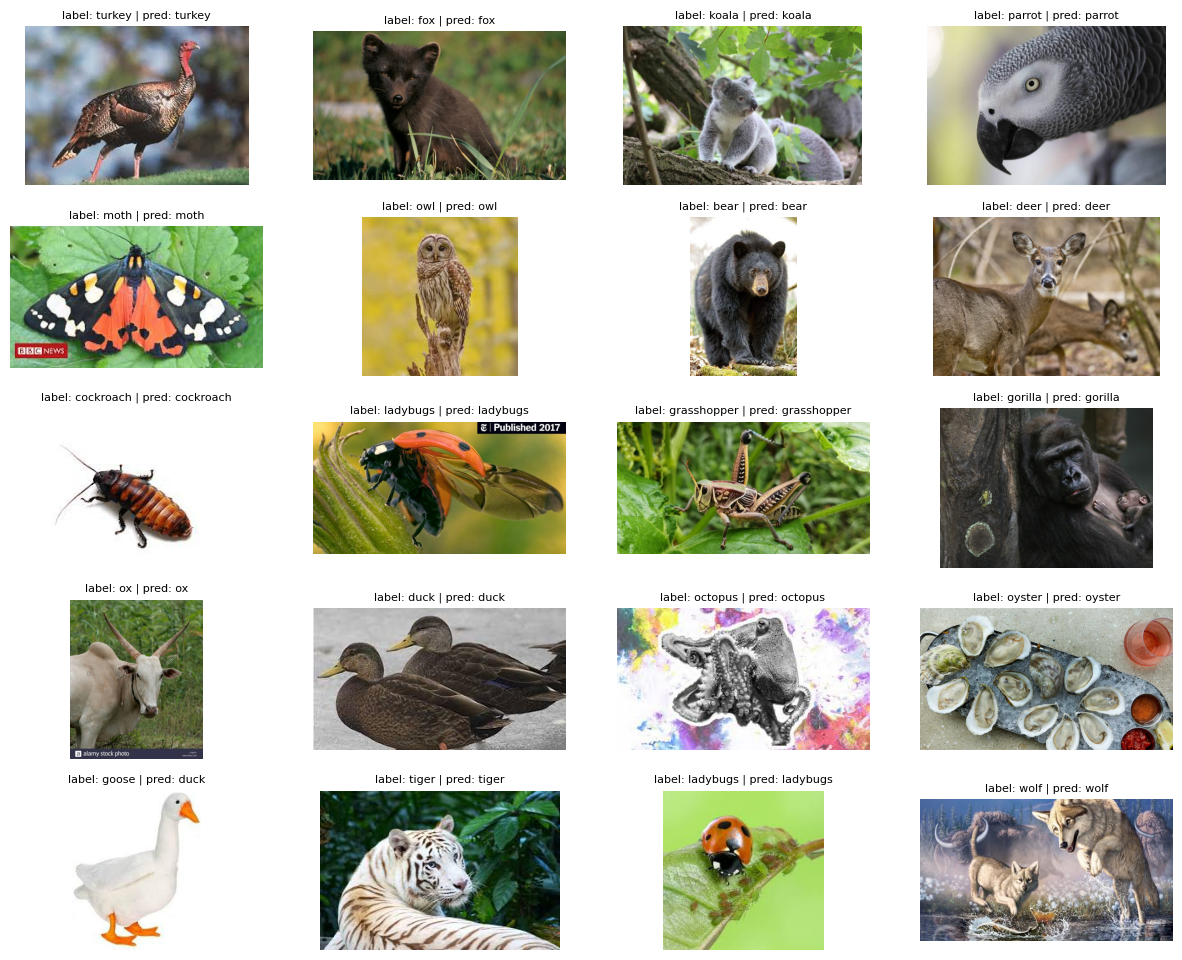

In [47]:
# Plot some predictions
plt.figure(figsize=(15,12))
for i, row in predictions.head(20).reset_index().iterrows():
  plt.subplot(5,4,i+1)
  image = Image.open(row['imgpath'])
  plt.imshow(image)
  plt.title(f'label: {row["labels"]} | pred: {row["prediction_labels"]}', fontsize=8)
  plt.axis("off")
plt.show()
